In [9]:
import pandas as pd

# Step 1.1: Load the Data
df = pd.read_csv(r"C:\Users\cadyw\Downloads\global_air_quality.csv")
print(df)

df['PM25_Value'] = df['FactValueNumeric']
print(df[['FactValueNumeric', 'PM25_Value']])

avg_pm25 = df.groupby('ParentLocation')['PM25_Value'].mean().reset_index()
avg_pm25.rename(columns={'PM25_Value': 'Average_PM25'}, inplace=True)
df = pd.merge(df, avg_pm25, on='ParentLocation', how='left')
print(df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']])

max_avg_pm25 = avg_pm25.loc[avg_pm25['Average_PM25'].idxmax()]
print(f"The continent with the highest average PM2.5 concentration is {max_avg_pm25['ParentLocation']} with an average concentration of {max_avg_pm25['Average_PM25']:.2f} µg/m³.")

df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']].to_csv('processed_air_quality.csv', index=False)
print("Processed data has been saved as 'processed_air_quality.csv'.")

      FactValueNumeric  PM25_Value
0                10.01       10.01
1                10.02       10.02
2                10.06       10.06
3                10.08       10.08
4                10.09       10.09
...                ...         ...
9445              9.92        9.92
9446              9.92        9.92
9447              9.94        9.94
9448              9.95        9.95
9449             92.79       92.79

[9450 rows x 2 columns]
                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                    

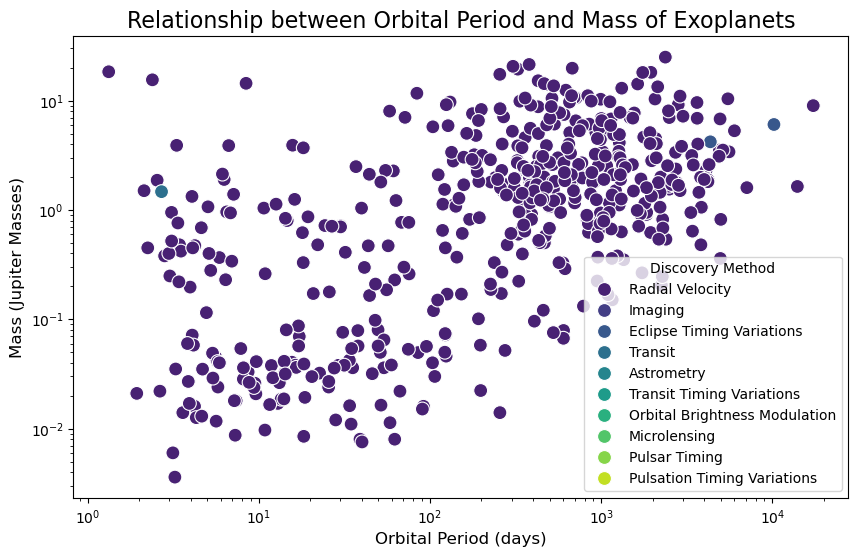

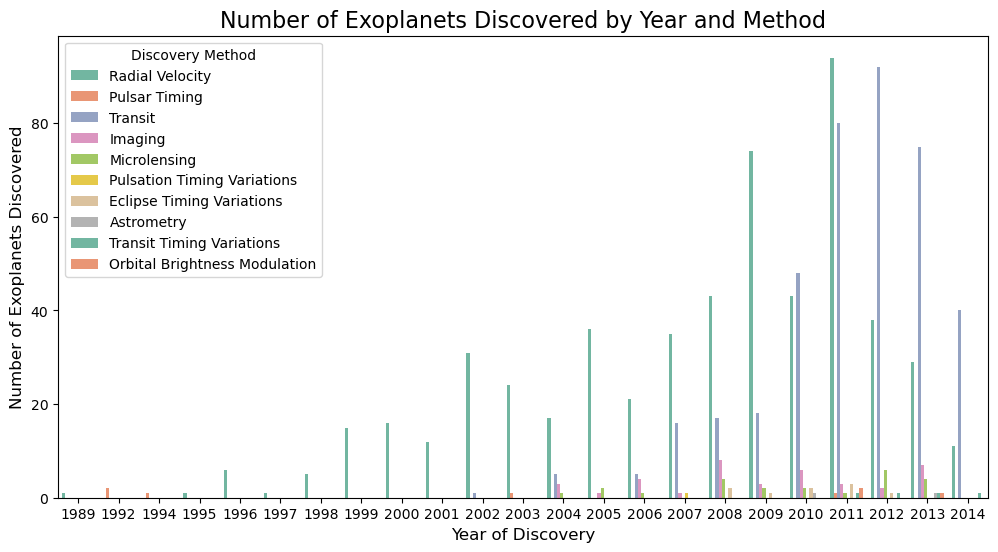

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
planets = sns.load_dataset('planets')

# 2.1 Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=planets, x='orbital_period', y='mass', hue='method', palette='viridis', s=100)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Orbital Period and Mass of Exoplanets', fontsize=16)
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel('Mass (Jupiter Masses)', fontsize=12)
plt.legend(title='Discovery Method')
plt.show()

# 2.2 Create the Stacked Bar Chart
plt.figure(figsize=(12, 6))
sns.countplot(data=planets, x='year', hue='method', palette='Set2')
plt.title('Number of Exoplanets Discovered by Year and Method', fontsize=16)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Number of Exoplanets Discovered', fontsize=12)
plt.legend(title='Discovery Method', loc='upper left')
plt.show()